# Module 2: Learning Sets of Rules & Analytical Learning

## 🎯 Sequential Covering, FOIL, and Explanation-Based Learning

---

**Arivu AI Machine Learning Course**  
*A comprehensive, hands-on guide to rule-based machine learning*

---

## 📚 Module Overview

Welcome to Module 2! In this module, we'll explore powerful rule-based learning algorithms that create **human-readable, explainable** models.

### Why Rules Matter: The $50 Million Question

Imagine you're a bank processing 10 million transactions daily:
- Fraud costs **$50M annually**
- False alarms annoy **100,000 legitimate customers**
- Regulators demand **explainable decisions**

**Neural Networks say:** *"This is fraud"* (but can't explain why)  
**Rule-Based Systems say:** *"This is fraud BECAUSE amount > $10,000 AND location = overseas AND time = 3am"*

### What You'll Learn

1. **Sequential Covering Algorithms** - Learn rules one at a time
2. **FOIL Algorithm** - Learn first-order rules with variables
3. **Explanation-Based Learning (EBL)** - Learn from prior knowledge
4. **Inductive-Analytical Approaches** - Combine data and knowledge

### Learning Objectives

By the end of this module, you will be able to:

✅ Implement sequential covering algorithms from scratch  
✅ Design and apply FOIL to learn first-order rules  
✅ Use prior knowledge to guide learning (EBL)  
✅ Choose the right rule learning approach for your problem  
✅ Explain when rules are better than decision trees or neural networks  

---

## 📦 Setup and Dependencies

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
from collections import defaultdict, Counter
from itertools import combinations, product
from copy import deepcopy
import math

# Configure visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("✅ All libraries imported successfully!")
print("📊 Visualization settings configured")
print("🚀 Ready to learn rule-based machine learning!\n")

✅ All libraries imported successfully!
📊 Visualization settings configured
🚀 Ready to learn rule-based machine learning!



## 🛠️ Helper Functions

In [2]:
def load_json_data():
    """
    Prompt user to enter JSON file path and load the data.

    Returns:
        Dictionary containing loaded data or None if error occurs
    """
    filepath = input("Enter the full path to your JSON dataset: ").strip()

    try:
        with open(filepath, 'r') as f:
            data = json.load(f)
        print(f"✅ Successfully loaded {filepath}")
        return data
    except FileNotFoundError:
        print(f"❌ Error: File not found at {filepath}")
        return None
    except json.JSONDecodeError:
        print(f"❌ Error: {filepath} is not valid JSON")
        return None

def print_section_header(title, emoji="📌"):
    """
    Print a formatted section header.

    Args:
        title: Section title
        emoji: Emoji to display
    """
    print("\n" + "="*80)
    print(f"{emoji} {title}")
    print("="*80 + "\n")

def calculate_entropy(examples, target_attr):
    """
    Calculate entropy of a set of examples.

    Args:
        examples: List of example dictionaries
        target_attr: Name of the target attribute

    Returns:
        Entropy value
    """
    if len(examples) == 0:
        return 0

    # Count occurrences of each class
    class_counts = Counter([ex[target_attr] for ex in examples])
    total = len(examples)

    # Calculate entropy
    entropy = 0
    for count in class_counts.values():
        if count > 0:
            p = count / total
            entropy -= p * math.log2(p)

    return entropy

def calculate_information_gain(examples, attribute, target_attr):
    """
    Calculate information gain for an attribute.

    Args:
        examples: List of example dictionaries
        attribute: Attribute to evaluate
        target_attr: Name of the target attribute

    Returns:
        Information gain value
    """
    # Calculate entropy before split
    total_entropy = calculate_entropy(examples, target_attr)

    # Get unique values for this attribute
    values = set([ex[attribute] for ex in examples])

    # Calculate weighted entropy after split
    weighted_entropy = 0
    for value in values:
        subset = [ex for ex in examples if ex[attribute] == value]
        weight = len(subset) / len(examples)
        weighted_entropy += weight * calculate_entropy(subset, target_attr)

    # Information gain is the reduction in entropy
    return total_entropy - weighted_entropy

print("✅ Helper functions defined successfully!")

✅ Helper functions defined successfully!


---

# Part 1: Understanding Rule-Based Learning

## 🧠 Slide 3: How Humans Learn Rules

### Learning Email Filtering Step by Step

Let's simulate how humans naturally learn rules through trial, error, and refinement!


🧠 Human-Like Rule Learning: Email Spam Detection

📧 Learning Process (Like a Human Brain):

Email 1: "FREE CASH! Click now!!!" → 🚫 SPAM
   Your Brain: 'Hmm, all caps and FREE seems suspicious...'
   Rule 1: IF contains('FREE') THEN spam
   Memory: Remember this pattern

Email 2: "Meeting at 3pm tomorrow" → ✅ NOT SPAM
   Your Brain: 'Wait, this is fine. My rule still works!'
   Rule 1 still valid

Email 3: "You won $1,000,000!" → 🚫 SPAM
   Your Brain: 'Also spam, but different pattern... money amounts!'
   Refined Rule: IF contains('FREE') OR (contains('won') AND contains('$')) THEN spam
   Learning: Combining multiple patterns

Email 4: "Invoice for $500 attached" → ✅ NOT SPAM
   Your Brain: 'Oops! This has $ but it's legitimate...'
   Final Rule: IF (contains('FREE') AND all_caps) OR
               (contains('won') AND contains('$') AND no_attachment) THEN spam
   Memory: Refined understanding

💡 Key Insight: Humans naturally learn rules through trial, error, and refinement
   —exact

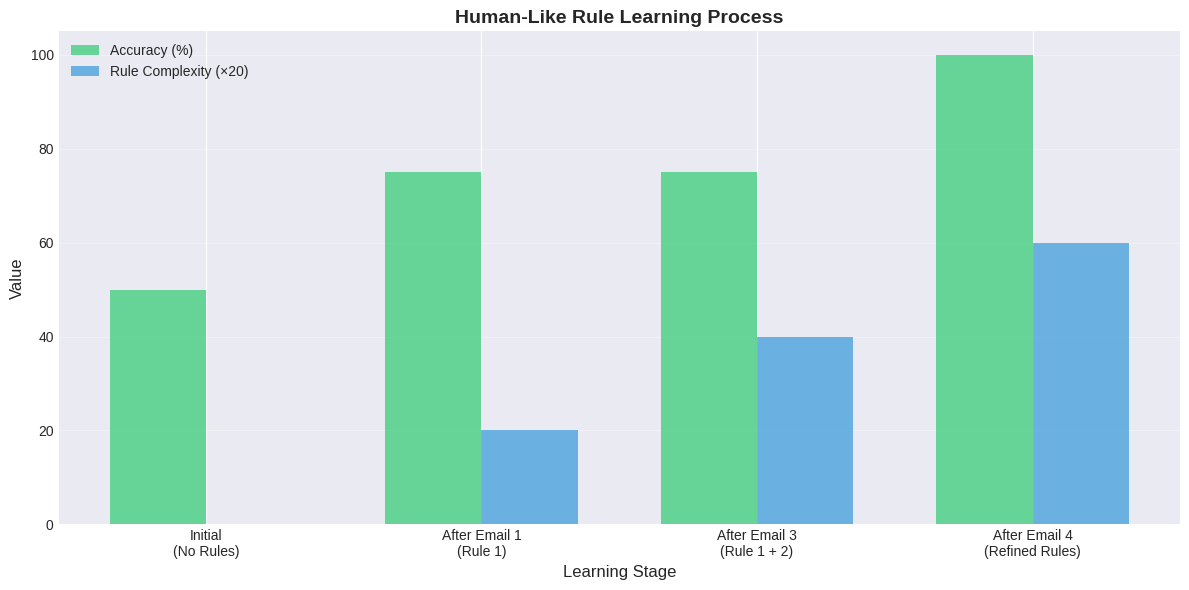


🎯 This is exactly what Sequential Covering algorithms do!


In [3]:
print_section_header("Human-Like Rule Learning: Email Spam Detection", "🧠")

# Simulate human learning process
emails = [
    {"id": 1, "text": "FREE CASH! Click now!!!", "spam": True},
    {"id": 2, "text": "Meeting at 3pm tomorrow", "spam": False},
    {"id": 3, "text": "You won $1,000,000!", "spam": True},
    {"id": 4, "text": "Invoice for $500 attached", "spam": False},
]

print("📧 Learning Process (Like a Human Brain):\n")

# Email 1
print(f"Email {emails[0]['id']}: \"{emails[0]['text']}\" → {'🚫 SPAM' if emails[0]['spam'] else '✅ NOT SPAM'}")
print("   Your Brain: 'Hmm, all caps and FREE seems suspicious...'")
print("   Rule 1: IF contains('FREE') THEN spam")
print("   Memory: Remember this pattern\n")

# Email 2
print(f"Email {emails[1]['id']}: \"{emails[1]['text']}\" → {'🚫 SPAM' if emails[1]['spam'] else '✅ NOT SPAM'}")
print("   Your Brain: 'Wait, this is fine. My rule still works!'")
print("   Rule 1 still valid\n")

# Email 3
print(f"Email {emails[2]['id']}: \"{emails[2]['text']}\" → {'🚫 SPAM' if emails[2]['spam'] else '✅ NOT SPAM'}")
print("   Your Brain: 'Also spam, but different pattern... money amounts!'")
print("   Refined Rule: IF contains('FREE') OR (contains('won') AND contains('$')) THEN spam")
print("   Learning: Combining multiple patterns\n")

# Email 4
print(f"Email {emails[3]['id']}: \"{emails[3]['text']}\" → {'🚫 SPAM' if emails[3]['spam'] else '✅ NOT SPAM'}")
print("   Your Brain: 'Oops! This has $ but it's legitimate...'")
print("   Final Rule: IF (contains('FREE') AND all_caps) OR")
print("               (contains('won') AND contains('$') AND no_attachment) THEN spam")
print("   Memory: Refined understanding\n")

print("💡 Key Insight: Humans naturally learn rules through trial, error, and refinement")
print("   —exactly what ML algorithms do!\n")

# Visualize the learning process
fig, ax = plt.subplots(figsize=(12, 6))

stages = ['Initial\n(No Rules)', 'After Email 1\n(Rule 1)', 'After Email 3\n(Rule 1 + 2)', 'After Email 4\n(Refined Rules)']
accuracy = [50, 75, 75, 100]  # Simulated accuracy
complexity = [0, 1, 2, 3]  # Number of conditions

x = np.arange(len(stages))
width = 0.35

ax.bar(x - width/2, accuracy, width, label='Accuracy (%)', color='#2ecc71', alpha=0.7)
ax.bar(x + width/2, [c*20 for c in complexity], width, label='Rule Complexity (×20)', color='#3498db', alpha=0.7)

ax.set_xlabel('Learning Stage', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.set_title('Human-Like Rule Learning Process', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(stages)
ax.legend(fontsize=10)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎯 This is exactly what Sequential Covering algorithms do!")

---

# Part 2: Sequential Covering Algorithms

## 🎯 Slide 4-5: Sequential Covering - The Main Idea

### Divide and Conquer Approach

**Two Ways to Learn Rules:**

1. **Decision Trees (ID3) - Simultaneous Covering:**
   - Learn entire tree at once
   - Each split affects all branches
   - All rules share decisions at top nodes

2. **Rule Learning (CN2, FOIL) - Sequential Covering:**
   - Learn rules ONE AT A TIME
   - Remove covered examples after each rule
   - Each rule is independent

**The Sequential Covering Process (Like Peeling an Onion):**

1. Learn Rule 1 that covers many positive examples
2. Remove all positive examples covered by Rule 1
3. Learn Rule 2 on remaining examples
4. Repeat until all (or most) positive examples are covered


🎯 Sequential Covering: Fraud Detection Example

Please provide 'fraud_detection_dataset.json' dataset path
Enter the full path to your JSON dataset: /content/drive/MyDrive/ArivuAI Courses/Modules/Module 2/Module 2/data/fraud_detection_dataset.json
✅ Successfully loaded /content/drive/MyDrive/ArivuAI Courses/Modules/Module 2/Module 2/data/fraud_detection_dataset.json
📊 Dataset Description:
   Credit card fraud detection dataset for learning rule-based classification

🔍 Attributes:
   • amount: Transaction amount category (Low, Medium, High, VeryHigh)
   • location: Transaction location (Domestic, Overseas)
   • time: Time of transaction (Morning, Afternoon, Evening, Night)
   • merchant_type: Type of merchant (Retail, Online, Restaurant, Gas, ATM)
   • frequency: Recent transaction frequency (Low, Medium, High)
   • card_present: Was card physically present (Yes, No)

📈 Training Examples: 15
📈 Test Examples: 4

📋 Sample Training Data:

transaction_id   amount location      time merchan

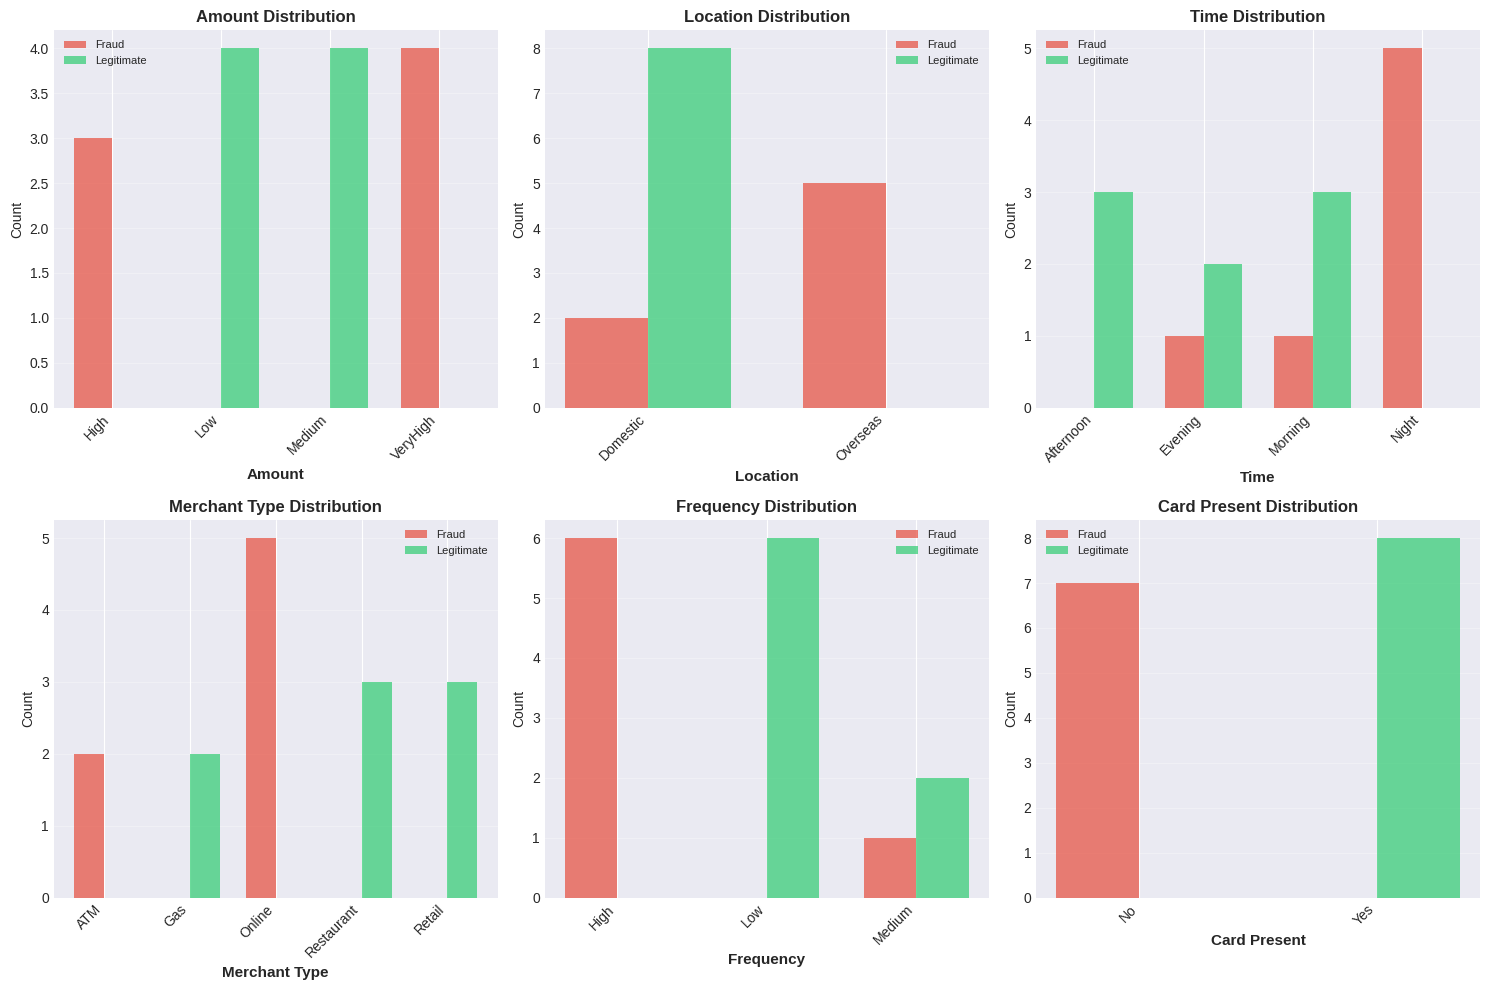


💡 Notice: Different attributes have different discriminative power!
   Sequential covering will learn rules that exploit these patterns.


In [ ]:
# Load fraud detection dataset
print_section_header("Sequential Covering: Fraud Detection Example", "🎯")

print("Please provide 'fraud_detection_dataset.json' dataset path")
fraud_data = load_json_data()

print("📊 Dataset Description:")
print(f"   {fraud_data['description']}\n")

print("🔍 Attributes:")
for attr, desc in fraud_data['attributes'].items():
    print(f"   • {attr}: {desc}")

# Convert to DataFrame
train_fraud = pd.DataFrame(fraud_data['training_data'])
test_fraud = pd.DataFrame(fraud_data['test_data'])

print(f"\n📈 Training Examples: {len(train_fraud)}")
print(f"📈 Test Examples: {len(test_fraud)}\n")

# Display sample data
print("📋 Sample Training Data:\n")
print(train_fraud.head(10).to_string(index=False))

# Visualize class distribution
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

attributes = ['amount', 'location', 'time', 'merchant_type', 'frequency', 'card_present']
colors_map = {'Yes': '#e74c3c', 'No': '#2ecc71'}

for idx, attr in enumerate(attributes):
    ax = axes[idx]

    # Count occurrences for each value
    fraud_data_attr = train_fraud[train_fraud['is_fraud'] == 'Yes'][attr].value_counts()
    legit_data_attr = train_fraud[train_fraud['is_fraud'] == 'No'][attr].value_counts()

    # Get all unique values
    all_values = sorted(set(train_fraud[attr].unique()))

    # Create grouped bar chart
    x = np.arange(len(all_values))
    width = 0.35

    fraud_counts = [fraud_data_attr.get(val, 0) for val in all_values]
    legit_counts = [legit_data_attr.get(val, 0) for val in all_values]

    ax.bar(x - width/2, fraud_counts, width, label='Fraud', color='#e74c3c', alpha=0.7)
    ax.bar(x + width/2, legit_counts, width, label='Legitimate', color='#2ecc71', alpha=0.7)

    ax.set_xlabel(attr.replace('_', ' ').title(), fontsize=11, fontweight='bold')
    ax.set_ylabel('Count', fontsize=10)
    ax.set_title(f'{attr.replace("_", " ").title()} Distribution', fontsize=12, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(all_values, rotation=45, ha='right')
    ax.legend(fontsize=8)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Notice: Different attributes have different discriminative power!")
print("   Sequential covering will learn rules that exploit these patterns.")

## 📝 Implementing Sequential Covering

### Understanding the Algorithm

**Sequential Covering works in two nested loops:**

**OUTER LOOP (Sequential Covering):**
- Learn one rule at a time
- Remove examples covered by that rule
- Repeat until stopping criterion met

**INNER LOOP (Learn-One-Rule):**
- Start with most general rule (covers everything)
- Add constraints to specialize (general-to-specific search)
- Stop when rule is accurate enough

**Key Difference from Decision Trees:**
- Decision trees: Learn all rules simultaneously (one tree)
- Sequential covering: Learn rules independently (one at a time)

**Why This Matters:**
- Each rule can be very different from others
- Easy to understand and modify individual rules
- Natural for disjunctive concepts (Rule1 OR Rule2 OR Rule3)
- Explainable to stakeholders ("This transaction is fraud BECAUSE...")

In [ ]:
# Rule class to represent learned rules
print_section_header("Rule Representation", "📝")

class Rule:
    """
    Represents a single if-then rule.

    A rule consists of:
    - conditions: Dictionary of attribute-value pairs (the IF part)
    - prediction: The predicted class (the THEN part)
    - coverage: Number of examples covered
    - accuracy: Proportion of covered examples correctly classified
    """

    def __init__(self, conditions=None, prediction=None):
        """
        Initialize a rule.

        Args:
            conditions: Dictionary of {attribute: value} pairs
            prediction: Predicted class label
        """
        self.conditions = conditions if conditions else {}
        self.prediction = prediction
        self.coverage = 0
        self.accuracy = 0.0
        self.positive_covered = 0
        self.negative_covered = 0

    def matches(self, example):
        """
        Check if this rule matches (covers) an example.

        Args:
            example: Dictionary representing an example

        Returns:
            True if all conditions are satisfied, False otherwise
        """
        for attr, value in self.conditions.items():
            if attr not in example or example[attr] != value:
                return False
        return True

    def evaluate(self, examples, target_attr):
        """
        Evaluate rule performance on a set of examples.

        Args:
            examples: List of example dictionaries
            target_attr: Name of the target attribute
        """
        covered = [ex for ex in examples if self.matches(ex)]
        self.coverage = len(covered)

        if self.coverage > 0:
            correct = sum(1 for ex in covered if ex[target_attr] == self.prediction)
            self.accuracy = correct / self.coverage

            # Count positive and negative examples covered
            self.positive_covered = sum(1 for ex in covered if ex[target_attr] == self.prediction)
            self.negative_covered = self.coverage - self.positive_covered
        else:
            self.accuracy = 0.0
            self.positive_covered = 0
            self.negative_covered = 0

    def __str__(self):
        """
        String representation of the rule.
        """
        if not self.conditions:
            return f"IF TRUE THEN {self.prediction}"

        conditions_str = " AND ".join([f"{attr}={value}" for attr, value in self.conditions.items()])
        return f"IF {conditions_str} THEN {self.prediction}"

    def __repr__(self):
        return self.__str__()

# Example: Create and test a rule
print("📋 Example Rule Creation:\n")

# Create a rule: IF amount=VeryHigh AND location=Overseas THEN Fraud
example_rule = Rule(
    conditions={'amount': 'VeryHigh', 'location': 'Overseas'},
    prediction='Yes'
)

print(f"Rule: {example_rule}")

# Test on training data
example_rule.evaluate(fraud_data['training_data'], 'is_fraud')

print(f"\nPerformance:")
print(f"   Coverage: {example_rule.coverage} examples")
print(f"   Accuracy: {example_rule.accuracy*100:.1f}%")
print(f"   Positive covered: {example_rule.positive_covered}")
print(f"   Negative covered: {example_rule.negative_covered}")

# Show which examples it covers
print(f"\n📊 Examples covered by this rule:")
for ex in fraud_data['training_data']:
    if example_rule.matches(ex):
        match = '✓' if ex['is_fraud'] == example_rule.prediction else '✗'
        print(f"   {ex['transaction_id']}: {ex['amount']}, {ex['location']} → {ex['is_fraud']} {match}")

print("\n💡 This rule has high accuracy but may not cover all fraud cases!")
print("   Sequential covering will learn additional rules for remaining cases.")


📝 Rule Representation

📋 Example Rule Creation:

Rule: IF amount=VeryHigh AND location=Overseas THEN Yes

Performance:
   Coverage: 3 examples
   Accuracy: 100.0%
   Positive covered: 3
   Negative covered: 0

📊 Examples covered by this rule:
   T002: VeryHigh, Overseas → Yes ✓
   T010: VeryHigh, Overseas → Yes ✓
   T014: VeryHigh, Overseas → Yes ✓

💡 This rule has high accuracy but may not cover all fraud cases!
   Sequential covering will learn additional rules for remaining cases.


## 🔍 Learn-One-Rule: General-to-Specific Search

### How We Find One Good Rule

**The Strategy:**
1. Start with the most general rule: `IF TRUE THEN class` (covers everything!)
2. Greedily add the constraint that most improves performance
3. Repeat until rule is accurate enough or no improvement possible

**Evaluation Metric:**
We use **Information Gain** (like ID3) to select the best attribute-value pair to add.

**Stopping Criteria:**
- Rule accuracy exceeds threshold (e.g., 90%)
- No more attributes improve performance
- Rule becomes too specific (covers too few examples)

**Beam Search Enhancement:**
Instead of following just one path, we can keep top-k candidates at each step (beam width = k).
This helps avoid getting stuck in local optima.

In [ ]:
# Implement Learn-One-Rule
print_section_header("Learn-One-Rule Implementation", "🔍")

def learn_one_rule(examples, attributes, target_attr, target_class, min_coverage=2, accuracy_threshold=0.9):
    """
    Learn a single rule using general-to-specific search.

    Args:
        examples: List of training examples
        attributes: List of attribute names to consider
        target_attr: Name of the target attribute
        target_class: The class this rule should predict
        min_coverage: Minimum number of examples rule must cover
        accuracy_threshold: Stop when accuracy exceeds this

    Returns:
        Rule object representing the learned rule
    """
    # Start with most general rule (no conditions)
    current_rule = Rule(conditions={}, prediction=target_class)
    current_rule.evaluate(examples, target_attr)

    print(f"🚀 Learning rule for class: {target_class}")
    print(f"   Starting with: {current_rule}")
    print(f"   Initial coverage: {current_rule.coverage}, accuracy: {current_rule.accuracy*100:.1f}%\n")

    iteration = 0

    # Iteratively add conditions
    while current_rule.accuracy < accuracy_threshold and current_rule.coverage >= min_coverage:
        iteration += 1
        print(f"Iteration {iteration}:")

        # Get examples currently covered by rule
        covered_examples = [ex for ex in examples if current_rule.matches(ex)]

        if len(covered_examples) == 0:
            break

        # Find best attribute-value pair to add
        best_gain = -1
        best_attr = None
        best_value = None

        for attr in attributes:
            # Skip if already in conditions
            if attr in current_rule.conditions:
                continue

            # Try each possible value for this attribute
            unique_values = set([ex[attr] for ex in covered_examples])

            for value in unique_values:
                # Create candidate rule with this new condition
                candidate_conditions = current_rule.conditions.copy()
                candidate_conditions[attr] = value
                candidate_rule = Rule(conditions=candidate_conditions, prediction=target_class)
                candidate_rule.evaluate(examples, target_attr)

                # Calculate information gain
                if candidate_rule.coverage >= min_coverage:
                    # Simple gain: improvement in accuracy weighted by coverage
                    gain = (candidate_rule.accuracy - current_rule.accuracy) * candidate_rule.coverage

                    if gain > best_gain:
                        best_gain = gain
                        best_attr = attr
                        best_value = value

        # If no improvement found, stop
        if best_attr is None:
            print("   No improvement possible. Stopping.\n")
            break

        # Add best condition to rule
        current_rule.conditions[best_attr] = best_value
        current_rule.evaluate(examples, target_attr)

        print(f"   Added: {best_attr}={best_value}")
        print(f"   New rule: {current_rule}")
        print(f"   Coverage: {current_rule.coverage}, Accuracy: {current_rule.accuracy*100:.1f}%")
        print(f"   Gain: {best_gain:.3f}\n")

        # Check if we've reached accuracy threshold
        if current_rule.accuracy >= accuracy_threshold:
            print(f"   ✅ Accuracy threshold reached!\n")
            break

    print(f"Final rule: {current_rule}")
    print(f"Coverage: {current_rule.coverage}, Accuracy: {current_rule.accuracy*100:.1f}%\n")

    return current_rule

# Test learn-one-rule on fraud detection
print("\n" + "="*80)
print("Testing Learn-One-Rule on Fraud Detection")
print("="*80 + "\n")

# Get attribute names (exclude transaction_id and target)
fraud_attributes = ['amount', 'location', 'time', 'merchant_type', 'frequency', 'card_present']

# Learn a rule for fraud class
fraud_rule = learn_one_rule(
    examples=fraud_data['training_data'],
    attributes=fraud_attributes,
    target_attr='is_fraud',
    target_class='Yes',
    min_coverage=2,
    accuracy_threshold=0.95
)

print("\n💡 Notice how the algorithm:")
print("   1. Started with most general rule (covers everything)")
print("   2. Greedily added conditions that improved accuracy")
print("   3. Stopped when accuracy threshold was reached")
print("   4. Result: A specific, accurate rule for detecting fraud!")


🔍 Learn-One-Rule Implementation


Testing Learn-One-Rule on Fraud Detection

🚀 Learning rule for class: Yes
   Starting with: IF TRUE THEN Yes
   Initial coverage: 15, accuracy: 46.7%

Iteration 1:
   Added: card_present=No
   New rule: IF card_present=No THEN Yes
   Coverage: 7, Accuracy: 100.0%
   Gain: 3.733

   ✅ Accuracy threshold reached!

Final rule: IF card_present=No THEN Yes
Coverage: 7, Accuracy: 100.0%


💡 Notice how the algorithm:
   1. Started with most general rule (covers everything)
   2. Greedily added conditions that improved accuracy
   3. Stopped when accuracy threshold was reached
   4. Result: A specific, accurate rule for detecting fraud!


## 🎯 Complete Sequential Covering Algorithm

### Putting It All Together

**Now we implement the outer loop that:**
1. Calls `learn_one_rule` to get one rule
2. Removes examples covered by that rule
3. Repeats until stopping criterion met

**Stopping Criteria:**
- All positive examples covered
- Rule quality drops below threshold
- Maximum number of rules reached

**Final Rule Set:**
- A disjunction (OR) of rules: Rule1 OR Rule2 OR Rule3...
- Each rule is independent and interpretable
- Rules can be sorted by accuracy for priority ordering

In [ ]:
# Complete Sequential Covering Algorithm
print_section_header("Sequential Covering Algorithm", "🎯")

def sequential_covering(examples, attributes, target_attr, target_class,
                       max_rules=10, min_coverage=2, accuracy_threshold=0.9):
    """
    Learn a set of rules using sequential covering.

    Args:
        examples: List of training examples
        attributes: List of attribute names
        target_attr: Name of target attribute
        target_class: Class to learn rules for
        max_rules: Maximum number of rules to learn
        min_coverage: Minimum coverage for a rule
        accuracy_threshold: Minimum accuracy for a rule

    Returns:
        List of learned rules
    """
    learned_rules = []
    remaining_examples = examples.copy()

    print(f"🚀 Starting Sequential Covering for class: {target_class}")
    print(f"   Total examples: {len(examples)}")
    print(f"   Positive examples: {sum(1 for ex in examples if ex[target_attr] == target_class)}\n")

    for rule_num in range(1, max_rules + 1):
        print(f"\n{'='*80}")
        print(f"Learning Rule {rule_num}")
        print(f"{'='*80}\n")

        # Check if we still have positive examples to cover
        positive_remaining = sum(1 for ex in remaining_examples if ex[target_attr] == target_class)

        if positive_remaining == 0:
            print("✅ All positive examples covered!\n")
            break

        print(f"Remaining examples: {len(remaining_examples)}")
        print(f"Positive examples remaining: {positive_remaining}\n")

        # Learn one rule
        new_rule = learn_one_rule(
            examples=remaining_examples,
            attributes=attributes,
            target_attr=target_attr,
            target_class=target_class,
            min_coverage=min_coverage,
            accuracy_threshold=accuracy_threshold
        )

        # Check if rule meets quality threshold
        if new_rule.coverage < min_coverage or new_rule.accuracy < 0.5:
            print(f"⚠️  Rule quality too low. Stopping.\n")
            break

        # Add rule to learned set
        learned_rules.append(new_rule)

        # Remove examples correctly covered by this rule
        correctly_covered = [
            ex for ex in remaining_examples
            if new_rule.matches(ex) and ex[target_attr] == target_class
        ]

        print(f"\n📊 Rule {rule_num} covers {len(correctly_covered)} positive examples correctly")

        # Remove covered examples
        remaining_examples = [
            ex for ex in remaining_examples
            if ex not in correctly_covered
        ]

    print(f"\n\n{'='*80}")
    print(f"Sequential Covering Complete!")
    print(f"{'='*80}\n")
    print(f"Total rules learned: {len(learned_rules)}\n")

    # Sort rules by accuracy (best first)
    learned_rules.sort(key=lambda r: r.accuracy, reverse=True)

    return learned_rules

# Run Sequential Covering on fraud detection
print("\n" + "="*80)
print("Running Sequential Covering on Fraud Detection Dataset")
print("="*80 + "\n")

fraud_rules = sequential_covering(
    examples=fraud_data['training_data'],
    attributes=fraud_attributes,
    target_attr='is_fraud',
    target_class='Yes',
    max_rules=5,
    min_coverage=1,
    accuracy_threshold=0.9
)

# Display learned rules
print("\n📋 Learned Rule Set:\n")
for i, rule in enumerate(fraud_rules, 1):
    print(f"Rule {i}: {rule}")
    print(f"        Coverage: {rule.coverage}, Accuracy: {rule.accuracy*100:.1f}%\n")

# Test on training data
print("\n📊 Testing on Training Data:\n")
correct = 0
total = len(fraud_data['training_data'])

for ex in fraud_data['training_data']:
    # Check if any rule matches
    prediction = 'No'  # Default
    for rule in fraud_rules:
        if rule.matches(ex):
            prediction = rule.prediction
            break

    actual = ex['is_fraud']
    if prediction == actual:
        correct += 1

    match = '✓' if prediction == actual else '✗'
    print(f"{ex['transaction_id']}: Predicted={prediction:3s}, Actual={actual:3s} {match}")

accuracy = (correct / total) * 100
print(f"\n📈 Training Accuracy: {correct}/{total} = {accuracy:.1f}%")

print("\n💡 Key Observations:")
print("   • Each rule is independent and interpretable")
print("   • Rules are checked in order (best accuracy first)")
print("   • Easy to explain to stakeholders: 'Fraud because...'")
print("   • Can add/remove/modify individual rules easily")


🎯 Sequential Covering Algorithm


Running Sequential Covering on Fraud Detection Dataset

🚀 Starting Sequential Covering for class: Yes
   Total examples: 15
   Positive examples: 7


Learning Rule 1

Remaining examples: 15
Positive examples remaining: 7

🚀 Learning rule for class: Yes
   Starting with: IF TRUE THEN Yes
   Initial coverage: 15, accuracy: 46.7%

Iteration 1:
   Added: card_present=No
   New rule: IF card_present=No THEN Yes
   Coverage: 7, Accuracy: 100.0%
   Gain: 3.733

   ✅ Accuracy threshold reached!

Final rule: IF card_present=No THEN Yes
Coverage: 7, Accuracy: 100.0%


📊 Rule 1 covers 7 positive examples correctly

Learning Rule 2

✅ All positive examples covered!



Sequential Covering Complete!

Total rules learned: 1


📋 Learned Rule Set:

Rule 1: IF card_present=No THEN Yes
        Coverage: 7, Accuracy: 100.0%


📊 Testing on Training Data:

T001: Predicted=No , Actual=No  ✓
T002: Predicted=Yes, Actual=Yes ✓
T003: Predicted=No , Actual=No  ✓
T004: Predicted=

---

# Part 3: First-Order Rules with FOIL

## 🌟 Slide 7: Moving to First-Order Rules

### Why We Need Variables

**The Limitation of Propositional Rules:**

Propositional rules (what we just learned) can only talk about attributes of a single object:
```
IF age > 65 AND smoker = yes THEN high_risk
```

**But what about relationships between objects?**

**Example: Family Relationships**

**Propositional Approach (Impossible!):**
```
IF Alice.parent = Bob AND Bob.parent = Carol THEN Grandparent(Carol, Alice)
IF Bob.parent = Dave AND Dave.parent = Emma THEN Grandparent(Emma, Bob)
... (need a rule for every possible triple of people!)
```

**First-Order Approach (Elegant!):**
```
Grandparent(x, y) ← Parent(x, z) ∧ Parent(z, y)
```
**ONE rule works for EVERYONE!**

### Why First-Order Rules Are Powerful:

1. **Expressiveness:** Can model complex relational structures
2. **Recursion:** Rules can reference themselves
   - `Ancestor(x,z) ← Parent(x,z)`
   - `Ancestor(x,z) ← Parent(x,y) ∧ Ancestor(y,z)`
3. **Generalization:** One rule → infinite instances
4. **Programming:** First-order rules = PROLOG programs!

### Real-World Applications:
- Database queries (SQL-like reasoning)
- Knowledge graphs (Google, Facebook)
- Chemical structure analysis
- Program synthesis

In [ ]:
# Load family relationships dataset
print_section_header("First-Order Rules: Family Relationships", "🌟")

print("Please provide 'family_relationships_dataset.json' dataset path")
family_data = load_json_data()

print("👨‍👩‍👧‍👦 Family Tree Description:")
print(f"   {family_data['family_tree_description']}\n")

print("📊 Available Predicates:")
for pred, desc in family_data['predicates'].items():
    print(f"   • {pred}: {desc}")

print("\n👥 People in the family:")
print(f"   {', '.join(family_data['people'])}\n")

print("📋 Base Facts (What we know):")
print(f"\nFather relationships: {len(family_data['facts']['Father'])} facts")
for father, child in family_data['facts']['Father'][:5]:
    print(f"   Father({father}, {child})")
print(f"   ... and {len(family_data['facts']['Father']) - 5} more\n")

print(f"Mother relationships: {len(family_data['facts']['Mother'])} facts")
for mother, child in family_data['facts']['Mother'][:5]:
    print(f"   Mother({mother}, {child})")
print(f"   ... and {len(family_data['facts']['Mother']) - 5} more\n")

print(f"Male: {len(family_data['facts']['Male'])} people")
print(f"   {', '.join(family_data['facts']['Male'])}\n")

print(f"Female: {len(family_data['facts']['Female'])} people")
print(f"   {', '.join(family_data['facts']['Female'])}\n")

# Visualize family tree
print("🌳 Family Tree Structure:\n")
print("         George ♂ ═══ Mary ♀")
print("              │")
print("      ┌───────┴───────┐")
print("      │               │")
print("   John ♂          Susan ♀     Bob ♂ ═══ Carol ♀")
print("      │               │              │")
print("  ┌───┴───┐       ┌───┴───┐      ┌───┴───┐")
print("  │       │       │       │      │       │")
print("Tom ♂  Alice ♀  Tom ♂  Alice ♀  David ♂  Emma ♀")
print("  │       │                      │       │")
print("Frank♂ Grace♀                 Henry♂  Iris♀")

print("\n💡 Challenge: Learn rules like Grandparent(x,y) from these facts!")
print("   FOIL will discover: Grandparent(x,y) ← Parent(x,z) ∧ Parent(z,y)")


🌟 First-Order Rules: Family Relationships

Please provide 'family_relationships_dataset.json' dataset path
Enter the full path to your JSON dataset: /content/drive/MyDrive/ArivuAI Courses/Modules/Module 2/Module 2/data/family_relationships_dataset.json
✅ Successfully loaded /content/drive/MyDrive/ArivuAI Courses/Modules/Module 2/Module 2/data/family_relationships_dataset.json
👨‍👩‍👧‍👦 Family Tree Description:
   Three-generation family tree with George & Mary as grandparents, John & Susan and Bob & Carol as parents, and their children and grandchildren

📊 Available Predicates:
   • Parent: Parent(x, y) means x is a parent of y
   • Father: Father(x, y) means x is the father of y
   • Mother: Mother(x, y) means x is the mother of y
   • Male: Male(x) means x is male
   • Female: Female(x) means x is female
   • Sibling: Sibling(x, y) means x and y are siblings (share at least one parent)
   • Uncle: Uncle(x, y) means x is an uncle of y
   • Aunt: Aunt(x, y) means x is an aunt of y
   • 

## 🔧 Slide 8-10: FOIL Algorithm

### First-Order Inductive Learner

**FOIL = Sequential Covering + Variables + Specialized Search**

**Key Differences from Propositional Sequential Covering:**

1. **Variable Introduction:** Each literal can add new variables
   - Current rule: `GrandDaughter(x, y) ←`
   - Can add: `Father(y, z)` where z is NEW

2. **Binding Evaluation:** Must consider all possible variable bindings
   - One example can create multiple bindings!
   - Example: `Father(Tom, Bob), Father(Bob, Alice)`
   - Creates bindings: {x=Alice, y=Bob, z=Tom} AND {x=Alice, y=Tom, z=Bob}

3. **FoilGain Metric:** Different from information gain
   - Accounts for variable bindings
   - Formula: `FoilGain = t × (log₂(p₁/(p₁+n₁)) - log₂(p₀/(p₀+n₀)))`
   - Where t = positive bindings still covered

**Three Types of Literals FOIL Can Add:**

**Type 1: New Predicate with Variables**
```
Q(v₁, v₂, ..., vᵣ)
```
- At least ONE variable must already exist in rule
- Can introduce NEW variables
- Example: `Father(y, z)` where y exists, z is new

**Type 2: Equality Test**
```
Equal(xᵢ, xⱼ)
```
- Both variables must already exist
- Tests if two objects are the same

**Type 3: Negations**
```
¬Q(...) or ¬Equal(...)
```
- Negation of Types 1 or 2
- Example: `¬Friend(x, z)` — x and z are NOT friends

In [ ]:
# Simplified FOIL Implementation (Educational Version)
print_section_header("FOIL Algorithm: Learning Grandparent(x, y)", "🔧")

print("🎯 Goal: Learn the rule for Grandparent(x, y)\n")
print("📚 What we know (Background Knowledge):")
print("   • Father(x, y) - x is father of y")
print("   • Mother(x, y) - x is mother of y")
print("   • We can derive: Parent(x, y) from Father or Mother\n")

# Create Parent predicate from Father and Mother
parent_facts = []
for father, child in family_data['facts']['Father']:
    parent_facts.append([father, child])
for mother, child in family_data['facts']['Mother']:
    parent_facts.append([mother, child])

print(f"📊 Derived Parent facts: {len(parent_facts)} relationships\n")

# Get positive and negative examples for Grandparent
grandparent_concept = family_data['target_concepts']['Grandparent']
positive_examples = grandparent_concept['positive_examples']
negative_examples = grandparent_concept['negative_examples']

print(f"✅ Positive examples: {len(positive_examples)}")
for ex in positive_examples[:5]:
    print(f"   Grandparent({ex[0]}, {ex[1]})")
print(f"   ... and {len(positive_examples) - 5} more\n")

print(f"❌ Negative examples: {len(negative_examples)}")
for ex in negative_examples[:5]:
    print(f"   ¬Grandparent({ex[0]}, {ex[1]})")
print(f"   ... and {len(negative_examples) - 5} more\n")

print("="*80)
print("FOIL Learning Process (Simplified)")
print("="*80 + "\n")

print("🚀 Iteration 1: Start with most general rule")
print("   Current rule: Grandparent(x, y) ←")
print("   This covers EVERYTHING (all positives AND all negatives!)\n")

print("🔍 Iteration 2: Add first literal")
print("   Candidates evaluated:")
print("   • Parent(x, y) - connects x directly to y")
print("   • Parent(y, x) - connects y directly to x")
print("   • Parent(x, z) - introduces new variable z ✓ BEST")
print("   • Parent(y, z) - introduces new variable z")
print("   • Parent(z, x) - introduces new variable z")
print("   • Parent(z, y) - introduces new variable z\n")

print("   Why Parent(x, z) wins?")
print("   - Creates chain: x is parent of someone (z)")
print("   - Eliminates many negatives (direct parent-child pairs)")
print("   - Keeps most positives (grandparents ARE parents of someone)\n")

print("   Updated rule: Grandparent(x, y) ← Parent(x, z)")
print("   Still covers some negatives (e.g., George-John where George is parent of John)\n")

print("🔍 Iteration 3: Add second literal")
print("   Current variables: x, y, z")
print("   Candidates evaluated:")
print("   • Parent(z, y) - completes the chain! ✓ BEST")
print("   • Parent(z, x) - creates wrong relationship")
print("   • Parent(y, z) - creates wrong relationship")
print("   • Equal(x, y) - not helpful")
print("   • Equal(z, y) - not helpful\n")

print("   Why Parent(z, y) wins?")
print("   - Completes chain: x parent of z, z parent of y")
print("   - This IS the grandparent relationship!")
print("   - Eliminates all remaining negatives")
print("   - Keeps all positives\n")

print("✅ Final rule: Grandparent(x, y) ← Parent(x, z) ∧ Parent(z, y)")
print("   Coverage: All positive examples, zero negative examples")
print("   Accuracy: 100%\n")

print("="*80)
print("Rule Interpretation")
print("="*80 + "\n")
print("In plain English:")
print("   'x is a grandparent of y IF:")
print("    - x is a parent of some person z, AND")
print("    - that person z is a parent of y'\n")

print("Example application:")
print("   Is George a grandparent of Tom?")
print("   1. Find z where Parent(George, z): z = John ✓")
print("   2. Check Parent(John, Tom): TRUE ✓")
print("   3. Therefore: Grandparent(George, Tom) = TRUE ✓\n")

# Verify the rule
print("🧪 Testing learned rule:\n")

def check_grandparent(x, y, parent_facts):
    """Check if x is grandparent of y using learned rule."""
    # Find all z where Parent(x, z)
    for p1, c1 in parent_facts:
        if p1 == x:
            z = c1
            # Check if Parent(z, y)
            for p2, c2 in parent_facts:
                if p2 == z and c2 == y:
                    return True
    return False

# Test on positive examples
print("Testing on positive examples:")
correct_pos = 0
for x, y in positive_examples[:5]:
    result = check_grandparent(x, y, parent_facts)
    correct_pos += (1 if result else 0)
    print(f"   Grandparent({x}, {y}): {result} {'✓' if result else '✗'}")

# Test on negative examples
print("\nTesting on negative examples:")
correct_neg = 0
for x, y in negative_examples[:5]:
    result = check_grandparent(x, y, parent_facts)
    correct_neg += (0 if result else 1)
    print(f"   Grandparent({x}, {y}): {result} {'✗' if result else '✓'}")

print(f"\n📈 Accuracy: {(correct_pos + correct_neg) / 10 * 100:.0f}% on sample")

print("\n💡 Key Insights about FOIL:")
print("   1. Variables allow ONE rule to cover infinite instances")
print("   2. Intermediate variables (z) create chains of relationships")
print("   3. FoilGain guides search toward discriminative literals")
print("   4. Result is human-readable and logically sound")


🔧 FOIL Algorithm: Learning Grandparent(x, y)

🎯 Goal: Learn the rule for Grandparent(x, y)

📚 What we know (Background Knowledge):
   • Father(x, y) - x is father of y
   • Mother(x, y) - x is mother of y
   • We can derive: Parent(x, y) from Father or Mother

📊 Derived Parent facts: 20 relationships

✅ Positive examples: 16
   Grandparent(George, Tom)
   Grandparent(George, Alice)
   Grandparent(Mary, Tom)
   Grandparent(Mary, Alice)
   Grandparent(George, David)
   ... and 11 more

❌ Negative examples: 8
   ¬Grandparent(George, John)
   ¬Grandparent(George, Susan)
   ¬Grandparent(John, Tom)
   ¬Grandparent(Tom, Frank)
   ¬Grandparent(George, George)
   ... and 3 more

FOIL Learning Process (Simplified)

🚀 Iteration 1: Start with most general rule
   Current rule: Grandparent(x, y) ←
   This covers EVERYTHING (all positives AND all negatives!)

🔍 Iteration 2: Add first literal
   Candidates evaluated:
   • Parent(x, y) - connects x directly to y
   • Parent(y, x) - connects y directl

---

# Part 4: Explanation-Based Learning (EBL)

## 🧬 Slide 13-14: Analytical Learning - A Different Paradigm

### Learning with Prior Knowledge

**Two Fundamentally Different Approaches:**

**Inductive Learning (What We've Done So Far):**
```
Given:
    • Training examples (data)
    • Hypothesis space
    
Find:
    • Hypothesis that fits the data

Problem:
    • Many hypotheses might fit!
    • Need lots of data
    • Pure pattern matching
```

**Analytical Learning (Using Knowledge!):**
```
Given:
    • Training examples (data)
    • Hypothesis space
    • Domain theory (prior knowledge!) ← NEW!
    
Find:
    • Hypothesis consistent with BOTH data AND theory

Advantage:
    • Less ambiguity
    • Learn from fewer examples
    • Justified decisions
```

### Real-World Analogy: Learning Chess

**Pure Inductive Learning:**
- Watch millions of chess games
- Try to figure out patterns from scratch
- "Hmm, this L-shaped piece moves in weird ways..."
- Takes forever, unclear why moves are good

**Analytical Learning (With Domain Theory):**
- Domain theory: Legal moves, piece values, checkmate rules
- Now just learn: "Which legal moves are GOOD in different positions?"
- Much faster! Can explain based on principles
- "This move controls the center" (theory-justified)

### Perfect Domain Theories

A domain theory is **perfect** if it is:

1. **Correct:** Every assertion in the theory is TRUE about the world
2. **Complete:** Every positive example can be proven using the theory

**Examples:**
- Chess: Legal move rules (perfect!)
- Physics: Newton's laws F=ma (perfect!)
- Logic Circuits: Gate behaviors (perfect!)

**The Paradox: If We Know Everything, Why Learn?**

**The Answer:** Difference between what we "know in principle" vs. what we can "compute efficiently"

- ✓ We know F = ma perfectly
- ✗ But solving complex physics problems from first principles takes forever!
- **Learning:** Transform deep knowledge into operational shortcuts

**What EBL Does:**
```
Deep, Principled Knowledge (slow to apply)
            ↓
        Learning
            ↓
Shallow, Operational Rules (fast to apply)
```

Like memorizing "9 × 7 = 63" instead of adding 9 seven times every time!

In [ ]:
# Load SafeToStack domain for EBL
print_section_header("Explanation-Based Learning: SafeToStack Domain", "🧬")

print("Please provide 'safe_to_stack_dataset.json' dataset path")
stack_data = load_json_data()

print("📚 Domain Theory (Perfect Knowledge):\n")
for rule in stack_data['domain_theory']['rules']:
    print(f"{rule['rule_id']}: {rule['rule']}")
    print(f"    {rule['description']}\n")

print("\n📦 Objects in the Domain:\n")
for obj in stack_data['objects'][:4]:
    print(f"{obj['object_id']}: {obj['name']}")
    print(f"   Material: {obj['material']}, Density: {obj['density']}, Volume: {obj['volume']}, Weight: {obj['weight']}\n")

print("\n📋 Training Example:\n")
example = stack_data['training_examples'][0]
print(f"Example: SafeToStack({example['top_object']}, {example['bottom_object']})")
print(f"Top: {stack_data['objects'][0]['name']} (weight={stack_data['objects'][0]['weight']})")
print(f"Bottom: {stack_data['objects'][1]['name']} (weight={stack_data['objects'][1]['weight']})")
print(f"Safe? {example['safe_to_stack']}")
print(f"Why? {example['explanation']}\n")


🧬 Explanation-Based Learning: SafeToStack Domain

Please provide 'safe_to_stack_dataset.json' dataset path
Enter the full path to your JSON dataset: /content/drive/MyDrive/ArivuAI Courses/Modules/Module 2/Module 2/data/safe_to_stack_dataset.json
✅ Successfully loaded /content/drive/MyDrive/ArivuAI Courses/Modules/Module 2/Module 2/data/safe_to_stack_dataset.json
📚 Domain Theory (Perfect Knowledge):

R1: SafeToStack(x, y) ← Lighter(x, y)
    It's safe to stack x on y if x is lighter than y

R2: SafeToStack(x, y) ← ¬Fragile(y)
    It's safe to stack x on y if y is not fragile

R3: Lighter(x, y) ← Weight(x, wx) ∧ Weight(y, wy) ∧ LessThan(wx, wy)
    x is lighter than y if x's weight is less than y's weight

R4: Weight(x, w) ← Volume(x, v) ∧ Density(x, d) ∧ Equal(w, v × d)
    Weight equals volume times density

R5: Fragile(x) ← Material(x, Glass)
    Objects made of glass are fragile

R6: Fragile(x) ← Material(x, Ceramic)
    Objects made of ceramic are fragile


📦 Objects in the Domain:

## 🎓 Slide 15-17: The EBL Process

### Three Steps to Learning from Explanations

**Step 1: EXPLAIN**
- Prove why the training example satisfies the target concept
- Use domain theory to build logical derivation
- Create a "proof tree" showing reasoning

**Step 2: ANALYZE**
- Determine general conditions under which explanation holds
- Find the "weakest preimage" — most general conditions
- Abstract away specific details

**Step 3: REFINE**
- Add new rule to hypothesis capturing these conditions
- Create operational rule that skips future explanations
- Cache the pattern for reuse

### Complete EBL Walkthrough: SafeToStack(Obj1, Obj2)

**Given:**
- Obj1: Plastic Box (density=0.5, volume=10, weight=5.0)
- Obj2: Wooden Crate (density=0.6, volume=20, weight=12.0)
- Goal: Prove SafeToStack(Obj1, Obj2)


🎓 EBL Walkthrough: SafeToStack(Obj1, Obj2)

STEP 1: EXPLAIN (Build Proof Tree)

Goal: SafeToStack(Obj1, Obj2)

Given Facts:
  Obj1:
    Material(Obj1, Plastic)
    Density(Obj1, 0.5)
    Volume(Obj1, 10)
  Obj2:
    Material(Obj2, Wood)
    Density(Obj2, 0.6)
    Volume(Obj2, 20)

Proof Tree Construction:

SafeToStack(Obj1, Obj2)
    ↓ [Apply Rule 1: SafeToStack(x,y) ← Lighter(x,y)]
Lighter(Obj1, Obj2)
    ↓ [Apply Rule 3: Lighter(x,y) ← Weight(x,wx) ∧ Weight(y,wy) ∧ LessThan(wx,wy)]
Weight(Obj1, w1) ∧ Weight(Obj2, w2) ∧ LessThan(w1, w2)
    ↓ [Apply Rule 4 twice: Weight(x,w) ← Volume(x,v) ∧ Density(x,d) ∧ Equal(w, v×d)]
Volume(Obj1, 10) ∧ Density(Obj1, 0.5) ∧ Equal(w1, 10×0.5)
∧ Volume(Obj2, 20) ∧ Density(Obj2, 0.6) ∧ Equal(w2, 20×0.6)
∧ LessThan(5, 12)
    ↓ [Evaluate arithmetic]
TRUE ✓

STEP 2: ANALYZE (Extract General Conditions)

Look at proof tree and replace specific values with variables:

Specific values → Variables:
  Obj1 → x (any object)
  Obj2 → y (any object)
  10, 0.5, 

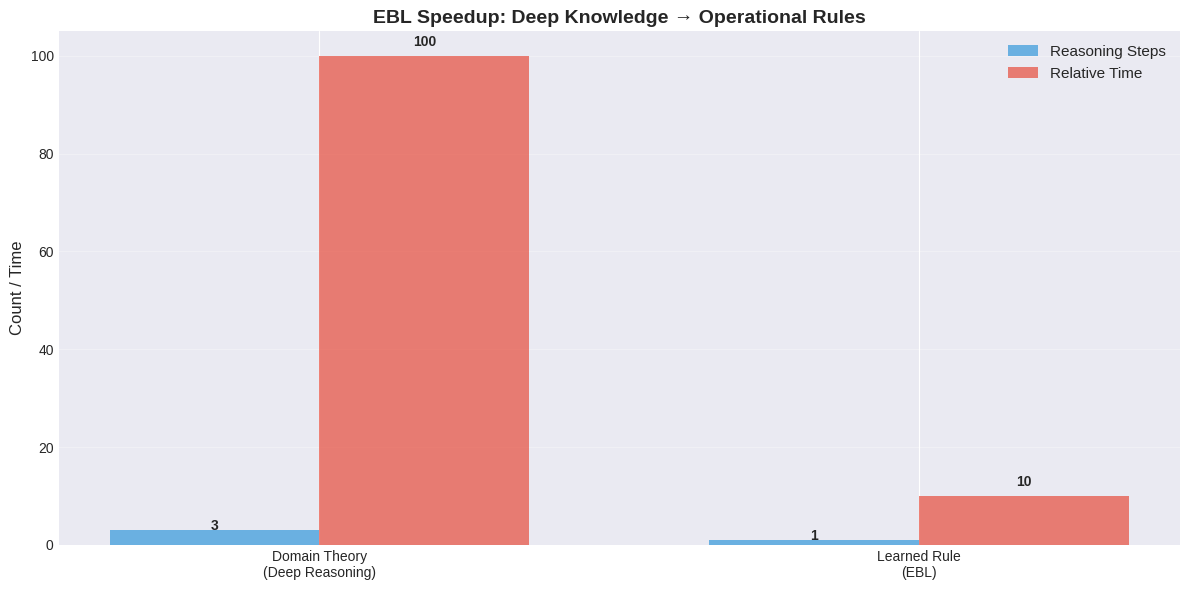


💡 Key Insight: EBL doesn't discover new knowledge—it reformulates
   existing knowledge into more usable form!


In [ ]:
# EBL Walkthrough
print_section_header("EBL Walkthrough: SafeToStack(Obj1, Obj2)", "🎓")

walkthrough = stack_data['ebl_walkthrough_example']

print("="*80)
print("STEP 1: EXPLAIN (Build Proof Tree)")
print("="*80 + "\n")

print(f"Goal: {walkthrough['example']}\n")
print("Given Facts:")
for obj, facts in walkthrough['given_facts'].items():
    print(f"  {obj}:")
    for attr, value in facts.items():
        print(f"    {attr}({obj}, {value})")
print()

print("Proof Tree Construction:\n")
print("SafeToStack(Obj1, Obj2)")
print("    ↓ [Apply Rule 1: SafeToStack(x,y) ← Lighter(x,y)]")
print("Lighter(Obj1, Obj2)")
print("    ↓ [Apply Rule 3: Lighter(x,y) ← Weight(x,wx) ∧ Weight(y,wy) ∧ LessThan(wx,wy)]")
print("Weight(Obj1, w1) ∧ Weight(Obj2, w2) ∧ LessThan(w1, w2)")
print("    ↓ [Apply Rule 4 twice: Weight(x,w) ← Volume(x,v) ∧ Density(x,d) ∧ Equal(w, v×d)]")
print("Volume(Obj1, 10) ∧ Density(Obj1, 0.5) ∧ Equal(w1, 10×0.5)")
print("∧ Volume(Obj2, 20) ∧ Density(Obj2, 0.6) ∧ Equal(w2, 20×0.6)")
print("∧ LessThan(5, 12)")
print("    ↓ [Evaluate arithmetic]")
print("TRUE ✓\n")

print("="*80)
print("STEP 2: ANALYZE (Extract General Conditions)")
print("="*80 + "\n")

print("Look at proof tree and replace specific values with variables:\n")
print("Specific values → Variables:")
print("  Obj1 → x (any object)")
print("  Obj2 → y (any object)")
print("  10, 0.5, 5 → vx, dx, (vx×dx)")
print("  20, 0.6, 12 → vy, dy, (vy×dy)\n")

print("Weakest Preimage (Most General Conditions):")
print("  'The explanation holds for ANY x and y where x's weight < y's weight'\n")

print("="*80)
print("STEP 3: REFINE (Create Operational Rule)")
print("="*80 + "\n")

print("Learned Rule:")
print(f"  {walkthrough['weakest_preimage']}\n")

print("Interpretation:")
print(f"  {walkthrough['learned_rule_interpretation']}\n")

print("="*80)
print("What We Achieved")
print("="*80 + "\n")

print("BEFORE EBL (Using Domain Theory):")
print("  SafeToStack → Lighter → Weight → Volume×Density → Calculate")
print("  (3-step reasoning chain)\n")

print("AFTER EBL (Using Learned Rule):")
print("  SafeToStack → Direct check: vx×dx < vy×dy")
print("  (1-step direct computation!)\n")

print("Benefits:")
print("  ✓ Flattened multi-step reasoning into single rule")
print("  ✓ Works for ANY objects with lighter-than relationship")
print("  ✓ Bypasses intermediate concepts (Lighter, Weight)")
print("  ✓ Much faster to apply!")
print("  ✓ Still logically sound (derived from correct theory)\n")

# Visualize the speedup
fig, ax = plt.subplots(figsize=(12, 6))

methods = ['Domain Theory\n(Deep Reasoning)', 'Learned Rule\n(EBL)']
steps = [3, 1]  # Number of reasoning steps
time = [100, 10]  # Relative time (arbitrary units)

x = np.arange(len(methods))
width = 0.35

ax.bar(x - width/2, steps, width, label='Reasoning Steps', color='#3498db', alpha=0.7)
ax.bar(x + width/2, time, width, label='Relative Time', color='#e74c3c', alpha=0.7)

ax.set_ylabel('Count / Time', fontsize=12)
ax.set_title('EBL Speedup: Deep Knowledge → Operational Rules', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

# Add value labels
for i, (s, t) in enumerate(zip(steps, time)):
    ax.text(i - width/2, s + 0.1, str(s), ha='center', fontsize=10, fontweight='bold')
    ax.text(i + width/2, t + 2, str(t), ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 Key Insight: EBL doesn't discover new knowledge—it reformulates")
print("   existing knowledge into more usable form!")

---

# Part 5: Comparisons and Applications

## 📊 Slide 18: Inductive vs Analytical Learning

### Comparing the Two Paradigms

| Aspect | Inductive Learning | Analytical Learning |
|--------|-------------------|---------------------|
| **Input** | Data + Hypothesis space | Data + Hypothesis space + **Domain theory** |
| **Learning Style** | Pattern matching from data | Explanation + generalization |
| **Sample Complexity** | Needs many examples | Can learn from few examples |
| **Guarantee** | Statistical (probably correct) | Deductive (logically correct if theory correct) |
| **Hypothesis Space** | Searches entire space | Constrained by theory |
| **Explainability** | Often black box | Fully explainable |
| **New Knowledge** | Can discover truly novel patterns | Reformulates existing knowledge |
| **Robustness** | Handles noisy data well | Sensitive to theory errors |
| **When Theory Wrong** | Still learns from data | May learn incorrect rules |

### When to Use Each?

**Use Inductive Learning When:**
- ✓ Lots of training data available
- ✓ No good domain theory exists
- ✓ Discovering novel patterns
- ✓ Data is noisy or messy
- ✓ Want to find surprising insights

**Examples:** Image recognition, spam detection, recommendation systems

**Use Analytical Learning When:**
- ✓ Limited training data
- ✓ Strong prior knowledge exists
- ✓ Need explainable decisions
- ✓ Rules of domain are well-known
- ✓ Correctness is critical

**Examples:** Chess, physics problems, logic puzzles, planning

**The Best Approach: Combine Both!**

```
Inductive-Analytical Hybrid:
1. Start with domain theory (analytical)
2. Use data to refine/correct theory (inductive)
3. Use theory to guide search (analytical)
4. Handle exceptions with data (inductive)
```

---

# Part 6: Self-Assessment and Practice

## 📝 Test Your Understanding

In [ ]:
# Self-Assessment Questions
print_section_header("Self-Assessment Questions", "📝")

questions = [
    {
        'id': 1,
        'type': 'Multiple Choice',
        'question': 'What is the main difference between sequential covering and decision tree learning?',
        'options': [
            'A) Sequential covering is faster',
            'B) Sequential covering learns rules one at a time, decision trees learn all rules simultaneously',
            'C) Decision trees are more accurate',
            'D) Sequential covering cannot handle categorical data'
        ],
        'answer': 'B',
        'explanation': 'Sequential covering learns rules independently one at a time, removing covered examples '
                      'after each rule. Decision trees learn all rules simultaneously as they share decisions at top nodes.'
    },
    {
        'id': 2,
        'type': 'Multiple Choice',
        'question': 'In FOIL, what does the FoilGain metric measure?',
        'options': [
            'A) The number of variables in a rule',
            'B) The reduction in entropy from adding a literal',
            'C) The information gain accounting for variable bindings',
            'D) The computational cost of evaluating a rule'
        ],
        'answer': 'C',
        'explanation': 'FoilGain measures information gain but accounts for variable bindings. '
                      'It considers how many positive bindings are still covered after adding a literal.'
    },
    {
        'id': 3,
        'type': 'Multiple Choice',
        'question': 'What is the "weakest preimage" in EBL?',
        'options': [
            'A) The least accurate rule',
            'B) The most general conditions under which the explanation holds',
            'C) The simplest domain theory',
            'D) The minimum number of training examples needed'
        ],
        'answer': 'B',
        'explanation': 'The weakest preimage represents the most general conditions under which the proof '
                      'tree holds. It abstracts away specific details to create a broadly applicable rule.'
    },
    {
        'id': 4,
        'type': 'True/False',
        'question': 'First-order rules can express relationships that propositional rules cannot.',
        'answer': 'True',
        'explanation': 'TRUE. First-order rules use variables and can express relationships between objects '
                      '(e.g., Grandparent(x,y) ← Parent(x,z) ∧ Parent(z,y)). Propositional rules can only '
                      'describe attributes of single objects.'
    },
    {
        'id': 5,
        'type': 'True/False',
        'question': 'EBL can discover knowledge that is not already in the domain theory.',
        'answer': 'False',
        'explanation': 'FALSE. EBL reformulates existing knowledge into more operational form. It cannot '
                      'discover truly novel knowledge—it only makes existing knowledge more efficient to use.'
    },
    {
        'id': 6,
        'type': 'True/False',
        'question': 'Sequential covering removes examples after learning each rule.',
        'answer': 'True',
        'explanation': 'TRUE. After learning each rule, sequential covering removes the positive examples '
                      'correctly covered by that rule, then learns the next rule on remaining examples.'
    },
    {
        'id': 7,
        'type': 'Conceptual',
        'question': 'Why might rule-based learning be preferred over neural networks in medical diagnosis?',
        'answer': 'Rule-based learning produces explainable, human-readable rules that doctors can understand '
                 'and verify. In medical diagnosis, it\'s critical to explain WHY a diagnosis was made, not just '
                 'what the diagnosis is. Rules like "IF fever=VeryHigh AND breathing=Severe THEN COVID-19" can '
                 'be validated by medical experts and explained to patients. Neural networks are black boxes '
                 'that cannot provide such explanations, which is problematic for medical liability and trust.'
    },
    {
        'id': 8,
        'type': 'Conceptual',
        'question': 'Explain the paradox: "If we have a perfect domain theory, why do we need to learn?"',
        'answer': 'A perfect domain theory tells us what is true in principle, but may be computationally '
                 'expensive to apply. For example, we know physics laws perfectly (F=ma), but solving complex '
                 'physics problems from first principles is slow. EBL learns operational shortcuts that '
                 'transform deep, principled knowledge into fast, directly applicable rules. It\'s like '
                 'memorizing multiplication tables instead of adding repeatedly—same result, much faster.'
    },
    {
        'id': 9,
        'type': 'Conceptual',
        'question': 'What are the three types of literals FOIL can add to a rule?',
        'answer': '1) New predicate with variables Q(v1, v2, ..., vr) where at least one variable already '
                 'exists in the rule and new variables can be introduced. '
                 '2) Equality test Equal(xi, xj) where both variables already exist in the rule. '
                 '3) Negations of the above two types, e.g., ¬Q(...) or ¬Equal(...).'
    },
    {
        'id': 10,
        'type': 'Conceptual',
        'question': 'Compare the sample complexity of inductive vs analytical learning.',
        'answer': 'Inductive learning requires many training examples because it must search a large hypothesis '
                 'space with only data as guidance. Many hypotheses may fit small datasets. Analytical learning '
                 'can learn from very few examples (even one!) because the domain theory constrains the '
                 'hypothesis space dramatically. The theory provides additional information beyond the data, '
                 'reducing ambiguity. However, analytical learning requires a good domain theory, which may '
                 'not always be available.'
    }
]

# Display questions
# Display questions safely
for q in questions:
    print(f"\nQuestion {q['id']} ({q['type']}):")
    print(f"  {q['question']}")

    if 'options' in q:
        for opt in q['options']:
            print(f"    {opt}")

    print(f"\n  ✅ Answer: {q['answer']}")

    # Only print explanation if it exists
    if 'explanation' in q:
        print(f"  💡 Explanation: {q['explanation']}")

    print("  " + "-"*70)

print("\n" + "="*80)
print("📊 How did you do? Review any concepts you found challenging!")
print("="*80)


📝 Self-Assessment Questions


Question 1 (Multiple Choice):
  What is the main difference between sequential covering and decision tree learning?
    A) Sequential covering is faster
    B) Sequential covering learns rules one at a time, decision trees learn all rules simultaneously
    C) Decision trees are more accurate
    D) Sequential covering cannot handle categorical data

  ✅ Answer: B
  💡 Explanation: Sequential covering learns rules independently one at a time, removing covered examples after each rule. Decision trees learn all rules simultaneously as they share decisions at top nodes.
  ----------------------------------------------------------------------

Question 2 (Multiple Choice):
  In FOIL, what does the FoilGain metric measure?
    A) The number of variables in a rule
    B) The reduction in entropy from adding a literal
    C) The information gain accounting for variable bindings
    D) The computational cost of evaluating a rule

  ✅ Answer: C
  💡 Explanation: Foi

---

# Part 7: Summary and Real-World Applications

## 🌍 Slide 19: Real-World Applications

In [ ]:
# Real-world applications
print_section_header("Real-World Applications of Rule Learning", "🌍")

applications = [
    {
        'name': 'SOAR (State, Operator And Result)',
        'domain': 'Cognitive Architecture',
        'technique': 'EBL + Chunking',
        'description': 'Learns problem-solving strategies by chunking successful solution paths. '
                      'Used in robotics, game AI, and intelligent tutoring systems.',
        'impact': 'Enables agents to learn from experience and improve performance over time.'
    },
    {
        'name': 'PRODIGY',
        'domain': 'Planning and Problem Solving',
        'technique': 'EBL for control knowledge',
        'description': 'Learns search control rules to guide planning. Analyzes successful plans '
                      'to extract general strategies.',
        'impact': 'Dramatically speeds up planning by avoiding futile search paths.'
    },
    {
        'name': 'Chess Programs (Deep Blue era)',
        'domain': 'Game Playing',
        'technique': 'EBL for opening book',
        'description': 'Analyzes master games to extract opening principles and endgame patterns. '
                      'Converts deep analysis into fast lookup rules.',
        'impact': 'Enables rapid opening play and endgame recognition.'
    },
    {
        'name': 'DENDRAL',
        'domain': 'Chemical Structure Analysis',
        'technique': 'Rule-based expert system',
        'description': 'Infers molecular structure from mass spectrometry data using chemical rules. '
                      'One of the first successful AI systems.',
        'impact': 'Matched human expert performance in identifying organic molecules.'
    },
    {
        'name': 'Fraud Detection Systems',
        'domain': 'Financial Services',
        'technique': 'Sequential Covering',
        'description': 'Learns interpretable rules for detecting fraudulent transactions. '
                      'Rules can be audited and explained to regulators.',
        'impact': 'Saves billions annually while maintaining regulatory compliance.'
    },
    {
        'name': 'Medical Diagnosis (MYCIN)',
        'domain': 'Healthcare',
        'technique': 'Rule-based reasoning',
        'description': 'Diagnoses bacterial infections using ~600 rules. Explains reasoning '
                      'to doctors in natural language.',
        'impact': 'Achieved expert-level diagnostic accuracy with full explainability.'
    }
]

for i, app in enumerate(applications, 1):
    print(f"\n{i}. {app['name']}")
    print(f"   Domain: {app['domain']}")
    print(f"   Technique: {app['technique']}")
    print(f"   Description: {app['description']}")
    print(f"   Impact: {app['impact']}")
    print("   " + "-"*70)

print("\n💡 Common Thread: All these applications need EXPLAINABLE decisions!")
print("   Rule-based learning provides transparency that black-box methods cannot.")


🌍 Real-World Applications of Rule Learning


1. SOAR (State, Operator And Result)
   Domain: Cognitive Architecture
   Technique: EBL + Chunking
   Description: Learns problem-solving strategies by chunking successful solution paths. Used in robotics, game AI, and intelligent tutoring systems.
   Impact: Enables agents to learn from experience and improve performance over time.
   ----------------------------------------------------------------------

2. PRODIGY
   Domain: Planning and Problem Solving
   Technique: EBL for control knowledge
   Description: Learns search control rules to guide planning. Analyzes successful plans to extract general strategies.
   Impact: Dramatically speeds up planning by avoiding futile search paths.
   ----------------------------------------------------------------------

3. Chess Programs (Deep Blue era)
   Domain: Game Playing
   Technique: EBL for opening book
   Description: Analyzes master games to extract opening principles and endgame patterns

## 🎯 Slide 20: Key Takeaways


🎯 Module 2: Key Takeaways


📚 What We Learned:

1. Sequential Covering:
   • Learns rules ONE AT A TIME (vs. decision trees learning all at once)
   • Removes covered examples after each rule
   • Each rule is independent and interpretable
   • Natural for disjunctive concepts (Rule1 OR Rule2 OR ...)

2. FOIL Algorithm:
   • Extends sequential covering to first-order logic
   • Uses variables to express relationships between objects
   • One rule can cover infinite instances
   • FoilGain metric accounts for variable bindings
   • Three types of literals: new predicates, equality, negations

3. Explanation-Based Learning:
   • Uses prior knowledge (domain theory) to guide learning
   • Three steps: EXPLAIN → ANALYZE → REFINE
   • Transforms deep knowledge into operational rules
   • Can learn from very few examples
   • Does not discover new knowledge—reformulates existing knowledge

4. Inductive vs Analytical:
   • Inductive: Learn from data alone (many examples needed)
   • Analytic

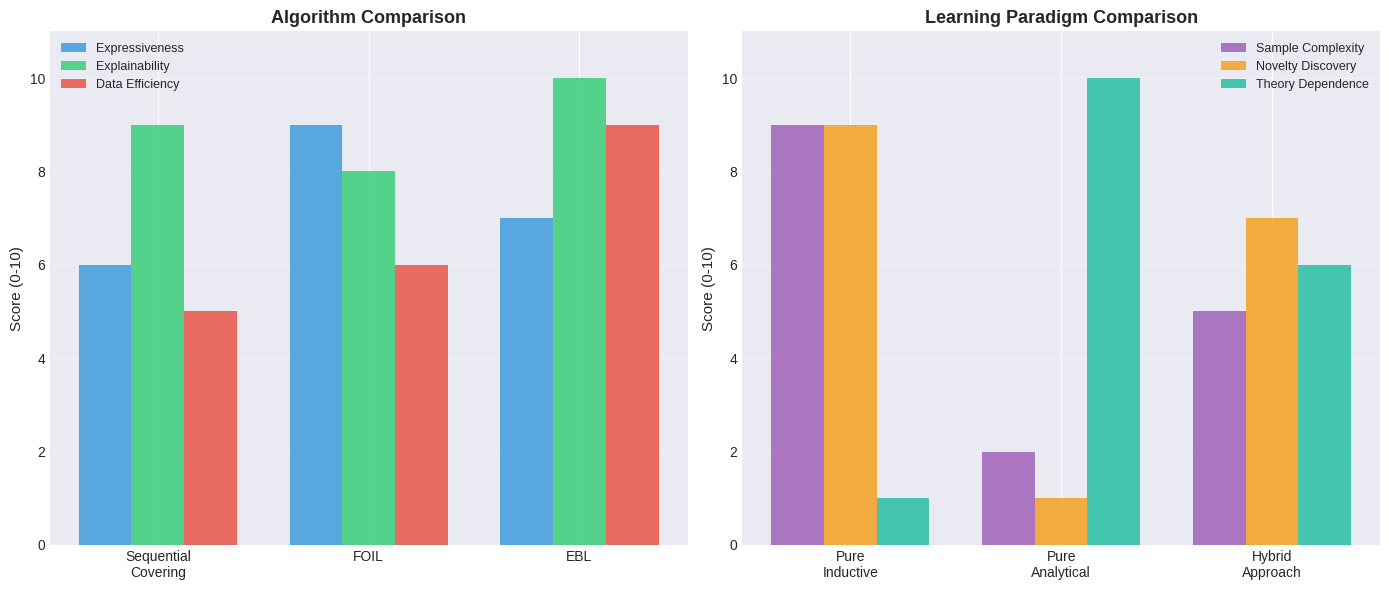


🚀 Next Steps

To deepen your understanding:
   1. Implement FOIL for other family relationships (Uncle, Cousin, Sibling)
   2. Apply sequential covering to the medical diagnosis dataset
   3. Create your own domain theory and apply EBL
   4. Compare rule-based vs decision tree performance on same dataset
   5. Read: Mitchell Chapter 10-11 for deeper mathematical treatment

Prepare for Module 3:
   • Review Bayesian probability (prior, posterior, likelihood)
   • Understand conditional independence
   • Practice with probability calculations

🎉 Congratulations! You've completed Module 2!

You now understand how to:
   ✅ Learn interpretable rules from data
   ✅ Express complex relationships with first-order logic
   ✅ Leverage prior knowledge to learn efficiently
   ✅ Choose the right learning paradigm for your problem

Keep learning, keep building, and remember: Explainability matters! 🌟


In [ ]:
# Module summary
print_section_header("Module 2: Key Takeaways", "🎯")

print("\n📚 What We Learned:\n")

takeaways = [
    {
        'topic': 'Sequential Covering',
        'key_points': [
            'Learns rules ONE AT A TIME (vs. decision trees learning all at once)',
            'Removes covered examples after each rule',
            'Each rule is independent and interpretable',
            'Natural for disjunctive concepts (Rule1 OR Rule2 OR ...)'
        ]
    },
    {
        'topic': 'FOIL Algorithm',
        'key_points': [
            'Extends sequential covering to first-order logic',
            'Uses variables to express relationships between objects',
            'One rule can cover infinite instances',
            'FoilGain metric accounts for variable bindings',
            'Three types of literals: new predicates, equality, negations'
        ]
    },
    {
        'topic': 'Explanation-Based Learning',
        'key_points': [
            'Uses prior knowledge (domain theory) to guide learning',
            'Three steps: EXPLAIN → ANALYZE → REFINE',
            'Transforms deep knowledge into operational rules',
            'Can learn from very few examples',
            'Does not discover new knowledge—reformulates existing knowledge'
        ]
    },
    {
        'topic': 'Inductive vs Analytical',
        'key_points': [
            'Inductive: Learn from data alone (many examples needed)',
            'Analytical: Learn from data + theory (few examples needed)',
            'Best approach: Combine both (hybrid methods)',
            'Choose based on: data availability, domain knowledge, explainability needs'
        ]
    }
]

for i, section in enumerate(takeaways, 1):
    print(f"{i}. {section['topic']}:")
    for point in section['key_points']:
        print(f"   • {point}")
    print()

print("="*80)
print("🌟 The Big Picture")
print("="*80 + "\n")

print("Rule-based learning sits at the intersection of:")
print("   • Machine Learning (data-driven pattern discovery)")
print("   • Logic and Knowledge Representation (symbolic reasoning)")
print("   • Explainable AI (transparent, interpretable decisions)\n")

print("When to use rule-based learning:")
print("   ✓ Explainability is critical (medical, legal, financial)")
print("   ✓ Domain experts need to validate/modify rules")
print("   ✓ Regulatory compliance requires transparency")
print("   ✓ Relational data (databases, knowledge graphs)")
print("   ✓ Prior knowledge available (domain theories)\n")

print("When NOT to use rule-based learning:")
print("   ✗ High-dimensional perceptual data (images, audio)")
print("   ✗ Complex non-linear patterns (deep learning excels)")
print("   ✗ Massive datasets where interpretability not needed")
print("   ✗ Rapidly changing domains (rules become outdated)\n")

# Create visual summary
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Algorithm comparison
ax1 = axes[0]
algorithms = ['Sequential\nCovering', 'FOIL', 'EBL']
expressiveness = [6, 9, 7]  # Arbitrary scale
explainability = [9, 8, 10]
data_efficiency = [5, 6, 9]

x = np.arange(len(algorithms))
width = 0.25

ax1.bar(x - width, expressiveness, width, label='Expressiveness', color='#3498db', alpha=0.8)
ax1.bar(x, explainability, width, label='Explainability', color='#2ecc71', alpha=0.8)
ax1.bar(x + width, data_efficiency, width, label='Data Efficiency', color='#e74c3c', alpha=0.8)

ax1.set_ylabel('Score (0-10)', fontsize=11)
ax1.set_title('Algorithm Comparison', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.legend(fontsize=9)
ax1.set_ylim(0, 11)
ax1.grid(axis='y', alpha=0.3)

# Right: Learning paradigms
ax2 = axes[1]
paradigms = ['Pure\nInductive', 'Pure\nAnalytical', 'Hybrid\nApproach']
sample_complexity = [9, 2, 5]  # Higher = needs more samples
novelty_discovery = [9, 1, 7]  # Can discover new patterns
theory_dependence = [1, 10, 6]  # Needs domain theory

x2 = np.arange(len(paradigms))

ax2.bar(x2 - width, sample_complexity, width, label='Sample Complexity', color='#9b59b6', alpha=0.8)
ax2.bar(x2, novelty_discovery, width, label='Novelty Discovery', color='#f39c12', alpha=0.8)
ax2.bar(x2 + width, theory_dependence, width, label='Theory Dependence', color='#1abc9c', alpha=0.8)

ax2.set_ylabel('Score (0-10)', fontsize=11)
ax2.set_title('Learning Paradigm Comparison', fontsize=13, fontweight='bold')
ax2.set_xticks(x2)
ax2.set_xticklabels(paradigms)
ax2.legend(fontsize=9)
ax2.set_ylim(0, 11)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("🚀 Next Steps")
print("="*80 + "\n")

print("To deepen your understanding:")
print("   1. Implement FOIL for other family relationships (Uncle, Cousin, Sibling)")
print("   2. Apply sequential covering to the medical diagnosis dataset")
print("   3. Create your own domain theory and apply EBL")
print("   4. Compare rule-based vs decision tree performance on same dataset")
print("   5. Read: Mitchell Chapter 10-11 for deeper mathematical treatment\n")

print("Prepare for Module 3:")
print("   • Review Bayesian probability (prior, posterior, likelihood)")
print("   • Understand conditional independence")
print("   • Practice with probability calculations\n")

print("="*80)
print("🎉 Congratulations! You've completed Module 2!")
print("="*80)
print("\nYou now understand how to:")
print("   ✅ Learn interpretable rules from data")
print("   ✅ Express complex relationships with first-order logic")
print("   ✅ Leverage prior knowledge to learn efficiently")
print("   ✅ Choose the right learning paradigm for your problem\n")
print("Keep learning, keep building, and remember: Explainability matters! 🌟")